In [1]:
from codes.network import generate_network
from codes.simulations import diffuse_behavior

In [2]:
import imp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Get full graph

In [4]:
G = generate_network(level_f='./')

Create connections...
Nodes after connections:  906
Edges created :  9042

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 469
Nodes removed for not having data for BMI: # 14
Nodes remaining after removal: # 423
###############################################################
Graph generated successfuly!
###############################################################



In [5]:
# Returs a COPY of the subgraphs
#graphs_no_intervention = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_random = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_centrality = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_high_risk = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)

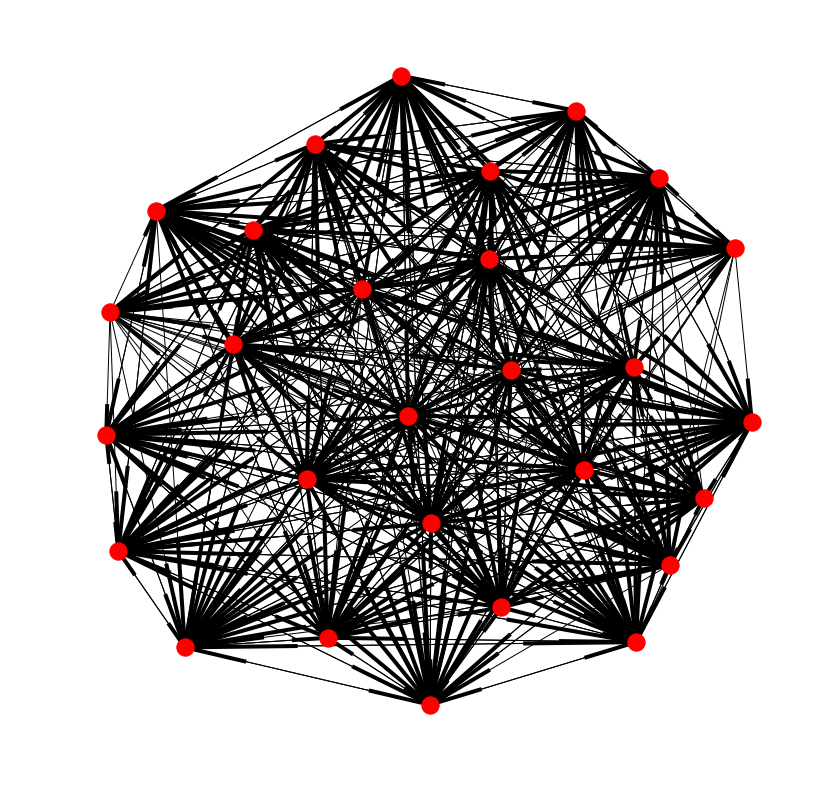

In [6]:
G0 = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]
graph_layout = 'spring'

if graph_layout == 'spring':
    graph_pos=nx.spring_layout(G0)
elif graph_layout == 'spectral':
    graph_pos=nx.spectral_layout(G0)
elif graph_layout == 'random':
    graph_pos=nx.random_layout(G0)
else:
    graph_pos=nx.shell_layout(G0)

node_color = 'b'
node_size = 10
node_alpha = 0.4
node_text_size=6
edge_color='blue'
edge_alpha=0.3
edge_tickness=0.1
edge_text_pos=0.3
text_font='sans-serif'

plt.figure(figsize=((14,14)))
nx.draw_networkx_nodes(G0,graph_pos,node_size=node_size, alpha=node_alpha, node_color=node_color)
nx.draw_networkx_edges(G0,graph_pos,width=edge_tickness, alpha=edge_alpha,edge_color=edge_color)
#nx.draw_networkx_labels(G0, graph_pos,font_size=node_text_size, font_family=text_font)
nx.draw(G0,pos=graph_pos)


# Evaluate all components

### Smaller cluster

In [7]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graph = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]

    diffuse_behavior(graph=graph, intervention=intervention, factor=factor, objective=objective, years=2)
    results_dict = dict(graph.nodes(data=True))
    for k, v in results_dict.items():
        BW_dict[k] = results_dict[k]['BW_hist']
    for k, v in results_dict.items():
        BMI_dict[k] = results_dict[k]['BMI_hist']
    
    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 696 edges!
Simulation without interventions.
Cluster contains 28 nodes and 696 edges!
Intervention started:  random
Cluster contains 28 nodes and 696 edges!
Intervention started:  centrality
Cluster contains 28 nodes and 696 edges!
Intervention started:  high_risk
Cluster contains 28 nodes and 696 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 28 nodes and 696 edges
Number of nodes to select:  3
Impact node #1346: 	obese: -8.5254 	overweight: -6.0694 	both: -14.5948 	all: -19.6757 
Impact node #1347: 	obese: -8.5245 	overweight: 2.8481 	both: -5.6763 	all: -18.8897 
Impact node #1348: 	obese: 0.0000 	overweight: -5.6639 	both: -5.6639 	all: -24.8271 
Impact node #1349: 	obese: 0.0000 	overweight: -5.6936 	both: -5.6936 	all: -24.1033 
Impact node 

(0, 729)

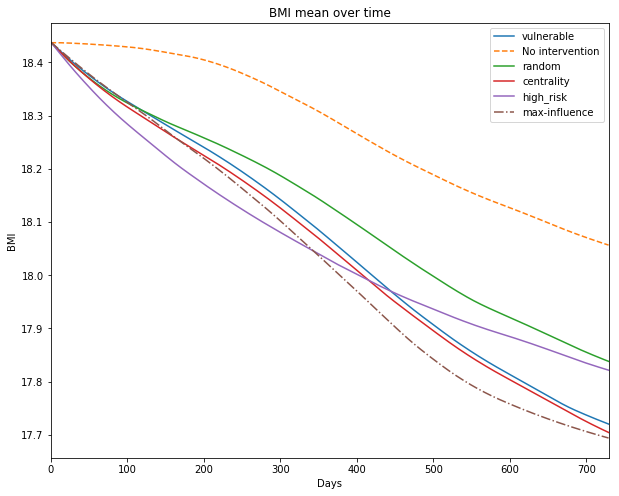

In [8]:
styles = {'vulnerable':'-', 'No intervention': '--', 'random': '-', 'centrality': '-', 'high_risk': '-', 
          'max-influence': '-.'}

#styles = ['b', 'r', 'g', 'y', 'b--']
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
#plt.ylim(19,20.25)
plt.xlim(0,729)

(0, 729)

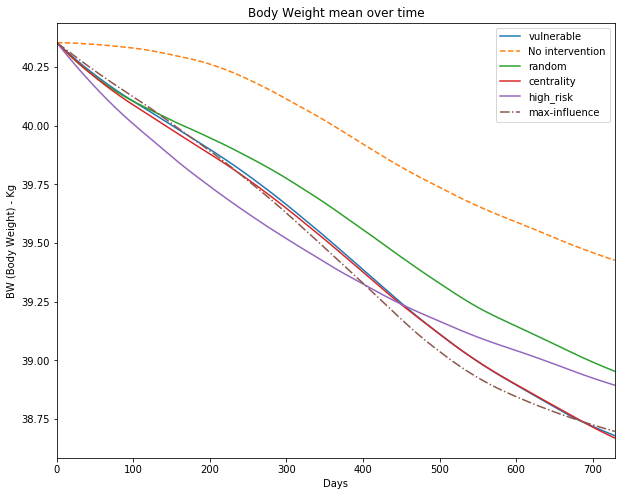

In [9]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
#plt.ylim(46,48)
plt.xlim(0,729)

In [10]:
PA_dict = {}
EI_dict = {}
BW_dict = {}
graph = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]

diffuse_behavior(graph=graph, intervention=None, years=2)
results_dict = dict(graph.nodes(data=True))
for k, v in results_dict.items():
    PA_dict[k] = results_dict[k]['PA_hist']
for k, v in results_dict.items():
    EI_dict[k] = results_dict[k]['EI_hist']
for k, v in results_dict.items():
    BW_dict[k] = results_dict[k]['BW_hist']
    

Simulation without interventions.
Cluster contains 28 nodes and 696 edges!


Text(0,0.5,'BW (Body Weight) - Kg')

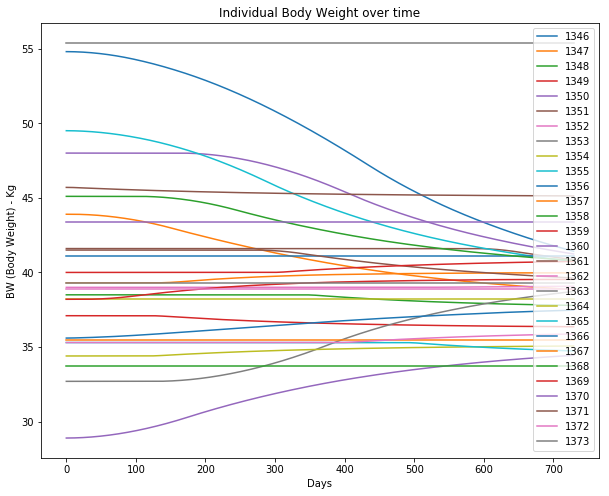

In [11]:
pd.DataFrame(BW_dict).plot(figsize=((10,8)))
plt.title('Individual Body Weight over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')

#plt.legend().set_visible(False)

In [12]:
pd.DataFrame(BW_dict).head()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
0,54.800000,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.500000,...,34.4,35.3,35.600000,35.5,33.7,40.0,43.4,45.700000,35.3,39.3
1,54.799888,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499883,...,34.4,35.3,35.600118,35.5,33.7,40.0,43.4,45.699858,35.3,39.3
2,54.799663,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499649,...,34.4,35.3,35.600355,35.5,33.7,40.0,43.4,45.699576,35.3,39.3
3,54.799327,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499298,...,34.4,35.3,35.600709,35.5,33.7,40.0,43.4,45.699153,35.3,39.3
4,54.798879,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.498830,...,34.4,35.3,35.601180,35.5,33.7,40.0,43.4,45.698590,35.3,39.3


In [13]:
pd.DataFrame(BW_dict).tail()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
725,41.471099,38.857934,37.790458,36.360596,41.268453,40.882392,39.070438,38.704700,38.2,40.748458,...,35.067361,34.745009,37.467888,35.5,33.7,40.735347,43.4,45.129215,35.873532,39.3
726,41.458793,38.855162,37.789658,36.360307,41.261175,40.876732,39.070697,38.709869,38.2,40.742836,...,35.067649,34.743595,37.469214,35.5,33.7,40.736037,43.4,45.129028,35.874400,39.3
727,41.446528,38.852399,37.788860,36.360019,41.253920,40.871091,39.070956,38.715020,38.2,40.737232,...,35.067935,34.742187,37.470535,35.5,33.7,40.736725,43.4,45.128842,35.875264,39.3
728,41.434302,38.849645,37.788066,36.359733,41.246690,40.865468,39.071214,38.720153,38.2,40.731646,...,35.068221,34.740786,37.471852,35.5,33.7,40.737409,43.4,45.128657,35.876126,39.3
729,41.422115,38.846900,37.787274,36.359448,41.239484,40.859864,39.071471,38.725269,38.2,40.726079,...,35.068505,34.739390,37.473164,35.5,33.7,40.738091,43.4,45.128473,35.876983,39.3


In [14]:
graph.nodes()

NodeView((1347, 1346, 1349, 1350, 1351, 1352, 1357, 1358, 1362, 1365, 1368, 1369, 1372, 1355, 1359, 1364, 1367, 1370, 1371, 1373, 1348, 1353, 1354, 1356, 1361, 1363, 1366, 1360))

### Full Graph

In [15]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
    for i in range(len(graphs)):
        diffuse_behavior(graph=graphs[i], intervention=intervention, factor=factor, objective=objective, years=2)
        results_dict = dict(graphs[i].nodes(data=True))
        for k, v in results_dict.items():
            BW_dict[k] = results_dict[k]['BW_hist']
        for k, v in results_dict.items():
            BMI_dict[k] = results_dict[k]['BMI_hist']

    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 696 edges!
Intervention started:  vulnerable
Cluster contains 25 nodes and 290 edges!
Intervention started:  vulnerable
Cluster contains 21 nodes and 305 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 269 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 318 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 243 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 240 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 226 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 226 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 279 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 194 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 207 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 232 edges!
Intervention started:  vu

Intervention started:  centrality
Cluster contains 6 nodes and 21 edges!
Intervention started:  centrality
Cluster contains 5 nodes and 15 edges!
Intervention started:  centrality
Cluster contains 3 nodes and 3 edges!
Intervention started:  high_risk
Cluster contains 28 nodes and 696 edges!
Intervention started:  high_risk
Cluster contains 25 nodes and 290 edges!
Intervention started:  high_risk
Cluster contains 21 nodes and 305 edges!
Intervention started:  high_risk
Cluster contains 20 nodes and 269 edges!
Intervention started:  high_risk
Cluster contains 20 nodes and 318 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 243 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 240 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 226 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 226 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 279 edges!
Intervention started:  high_risk
Cluster c

Impact node #1350: 	obese: 0.0000 	overweight: -7.9163 	both: -7.9163 	all: -35.9594 
Impact node #1351: 	obese: 0.0000 	overweight: -9.1540 	both: -9.1540 	all: -37.0013 
Impact node #1352: 	obese: 0.0000 	overweight: -7.0930 	both: -7.0930 	all: -34.2485 
Impact node #1353: 	obese: 0.0000 	overweight: -8.5878 	both: -8.5878 	all: -36.5356 
Impact node #1354: 	obese: 0.0000 	overweight: -6.9828 	both: -6.9828 	all: -34.3617 
Impact node #1355: 	obese: -4.0318 	overweight: 1.6207 	both: -2.4111 	all: -28.7283 
Impact node #1356: 	obese: 0.0000 	overweight: -6.6671 	both: -6.6671 	all: -33.6964 
Impact node #1357: 	obese: 0.0000 	overweight: -7.9411 	both: -7.9411 	all: -36.0145 
Impact node #1358: 	obese: 0.0000 	overweight: -7.7045 	both: -7.7045 	all: -32.7893 
Impact node #1359: 	obese: 0.0000 	overweight: -7.9893 	both: -7.9893 	all: -36.8155 
Impact node #1361: 	obese: 0.0000 	overweight: -8.2785 	both: -8.2785 	all: -36.0553 
Impact node #1362: 	obese: 0.0000 	overweight: -6.5970

Impact node #2719: 	obese: 5.1945 	overweight: 14.2117 	both: 19.4063 	all: 19.4063 
Impact node #2720: 	obese: 4.6270 	overweight: 15.1968 	both: 19.8238 	all: 19.8238 
Impact node #2722: 	obese: 4.4363 	overweight: 16.4885 	both: 20.9248 	all: 20.6033 
Impact node #2725: 	obese: 13.2323 	overweight: 15.9170 	both: 29.1493 	all: 28.2065 
Impact node #2726: 	obese: 4.3625 	overweight: 16.4288 	both: 20.7914 	all: 21.8111 
Impact node #2727: 	obese: 16.0489 	overweight: 3.4027 	both: 19.4515 	all: 19.5634 
Impact node #2728: 	obese: 3.7770 	overweight: 15.3309 	both: 19.1079 	all: 18.1652 
Impact node #2729: 	obese: 3.5765 	overweight: 13.3396 	both: 16.9161 	all: 15.9734 
Impact node #2730: 	obese: 4.5167 	overweight: 15.8368 	both: 20.3535 	all: 19.5773 
Impact node #2731: 	obese: 4.4998 	overweight: 12.1492 	both: 16.6490 	all: 15.8728 
Impact node #2732: 	obese: -4.4451 	overweight: 12.3706 	both: 7.9255 	all: 10.0824 
Impact node #2734: 	obese: 4.3531 	overweight: 16.5933 	both: 20

Impact node #1380: 	obese: 9.4809 	overweight: 11.8323 	both: 21.3132 	all: 20.9662 
Impact node #1381: 	obese: 9.8659 	overweight: 10.8123 	both: 20.6782 	all: 21.3737 
Impact node #1382: 	obese: 10.2261 	overweight: 10.5458 	both: 20.7720 	all: 21.2414 
Impact node #1383: 	obese: 10.1924 	overweight: 8.5752 	both: 18.7676 	all: 19.8736 
Impact node #1385: 	obese: -2.1715 	overweight: 16.7172 	both: 14.5457 	all: 15.5992 
Impact node #1386: 	obese: 10.0816 	overweight: 10.7798 	both: 20.8613 	all: 21.5494 
Impact node #1389: 	obese: 9.7974 	overweight: 10.5091 	both: 20.3065 	all: 20.0519 
Impact node #1390: 	obese: 9.6305 	overweight: 11.7734 	both: 21.4039 	all: 22.6541 
Impact node #1391: 	obese: 10.0208 	overweight: 10.1933 	both: 20.2141 	all: 19.8360 
Impact node #1392: 	obese: 9.6441 	overweight: 1.9587 	both: 11.6028 	all: 12.4938 
Impact node #1393: 	obese: 10.0873 	overweight: 9.8853 	both: 19.9726 	all: 20.8285 
Impact node #1394: 	obese: 10.0281 	overweight: 11.8729 	both:

Impact node #2827: 	obese: 1.9006 	overweight: 51.3478 	both: 53.2484 	all: 54.9005 
Impact node #2828: 	obese: 3.6013 	overweight: 49.3060 	both: 52.9073 	all: 53.9090 
Impact node #2829: 	obese: 16.4480 	overweight: 39.3890 	both: 55.8370 	all: 56.8124 
Impact node #2830: 	obese: 2.1463 	overweight: 38.3781 	both: 40.5244 	all: 43.6330 
Impact node #2831: 	obese: 2.1537 	overweight: 50.1892 	both: 52.3429 	all: 53.8499 
Impact node #2832: 	obese: 12.2672 	overweight: 42.0047 	both: 54.2719 	all: 55.9125 
Impact node #2833: 	obese: 2.2422 	overweight: 47.5007 	both: 49.7429 	all: 51.1387 
Impact node #2811: 	obese: 11.8668 	overweight: 42.4542 	both: 54.3210 	all: 56.2922 
Impact node #2812: 	obese: 2.3548 	overweight: 50.6573 	both: 53.0121 	all: 53.9098 
Impact node #2813: 	obese: 1.2920 	overweight: 44.0177 	both: 45.3097 	all: 46.4251 
Impact node #2814: 	obese: 2.0156 	overweight: 47.7033 	both: 49.7189 	all: 48.9819 
Keys in order of impact:  [2820, 2830, 2825, 2813, 2814, 2816,

Impact node #2039: 	obese: -14.3982 	overweight: -11.4242 	both: -25.8223 	all: -19.9658 
Impact node #2040: 	obese: -12.5521 	overweight: -10.2253 	both: -22.7774 	all: -16.3391 
Impact node #2041: 	obese: -8.9894 	overweight: -10.3737 	both: -19.3631 	all: -13.6553 
Impact node #2043: 	obese: -14.6975 	overweight: -11.2998 	both: -25.9972 	all: -20.2905 
Impact node #2044: 	obese: -14.0114 	overweight: -11.3722 	both: -25.3836 	all: -19.6822 
Impact node #2045: 	obese: -14.0176 	overweight: -11.3798 	both: -25.3974 	all: -19.7347 
Keys in order of impact:  [2036, 2051, 2043, 2039, 2045, 2044, 2048, 2038, 2035, 2034, 2031, 2052, 2026, 2025, 2040, 2041, 2037, 2032]
Node #1 selected: 2036 with an BW impact of -21.896640936615448!

Impact node #2048: 	obese: -15.4384 	overweight: -1.2344 	both: -16.6728 	all: -21.2766 
Impact node #2051: 	obese: -15.9732 	overweight: -0.7636 	both: -16.7368 	all: -24.8596 
Impact node #2052: 	obese: -15.4284 	overweight: -0.6265 	both: -16.0549 	all: -20

Impact node #967: 	obese: -1.2995 	overweight: 8.8375 	both: 7.5381 	all: 8.7093 
Impact node #968: 	obese: -1.3219 	overweight: 8.2449 	both: 6.9229 	all: 8.2309 
Impact node #971: 	obese: -1.1467 	overweight: 8.1098 	both: 6.9631 	all: 7.7112 
Impact node #972: 	obese: -1.1645 	overweight: 11.0138 	both: 9.8493 	all: 10.6868 
Impact node #973: 	obese: -1.2589 	overweight: 8.2737 	both: 7.0147 	all: 6.4768 
Impact node #974: 	obese: -2.0249 	overweight: 2.3615 	both: 0.3366 	all: 6.7997 
Impact node #975: 	obese: -1.0797 	overweight: 8.4198 	both: 7.3401 	all: 7.8259 
Impact node #977: 	obese: -2.3233 	overweight: 2.5942 	both: 0.2709 	all: 5.6405 
Impact node #978: 	obese: -2.2758 	overweight: 2.5081 	both: 0.2322 	all: 5.3331 
Impact node #979: 	obese: 1.1029 	overweight: 8.5908 	both: 9.6937 	all: 11.5034 
Impact node #980: 	obese: -2.1564 	overweight: 2.4263 	both: 0.2700 	all: 5.9590 
Impact node #982: 	obese: -1.1724 	overweight: 13.5640 	both: 12.3916 	all: 13.1988 
Impact node

Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 16 nodes and 208 edges
Number of nodes to select:  2
Impact node #2003: 	obese: -0.8899 	overweight: 0.0000 	both: -0.8899 	all: -0.7992 
Impact node #2004: 	obese: 0.9814 	overweight: -1.2540 	both: -0.2726 	all: 2.0497 
Impact node #2006: 	obese: -0.4529 	overweight: -1.3295 	both: -1.7824 	all: -1.7260 
Impact node #2008: 	obese: -0.7127 	overweight: -1.3313 	both: -2.0440 	all: -2.0206 
Impact node #2009: 	obese: -1.3688 	overweight: -1.4835 	both: -2.8522 	all: -0.9278 
Impact node #2011: 	obese: -1.1737 	overweight: -1.4068 	both: -2.5805 	all: -1.0014 
Impact node #2012: 	obese: -1.4670 	overweight: -1.5567 	both: -3.0237 	all: -0.7580 
Impact node #2013: 	obese: -1.4654 	overweight: -1.5212 	both: -2.9865 	all: -2.9320 
Impact node #2015: 	obese: -1.9490 	overwei

Impact node #1564: 	obese: 1.2013 	overweight: 3.6185 	both: 4.8199 	all: 7.3787 
Keys in order of impact:  [1563, 1549, 1553, 1561, 1562, 1560, 1548, 1559, 1550, 1558, 1564, 1556, 1555, 1551, 1552]
Node #1 selected: 1563 with an BW impact of -2.984142849337726!

Impact node #1548: 	obese: -9.7712 	overweight: 6.7641 	both: -3.0071 	all: -0.5030 
Impact node #1549: 	obese: -16.6705 	overweight: 4.7199 	both: -11.9505 	all: -10.1282 
Impact node #1550: 	obese: -8.3219 	overweight: 5.5670 	both: -2.7549 	all: -0.6007 
Impact node #1551: 	obese: -9.3739 	overweight: 8.9869 	both: -0.3870 	all: 1.8038 
Impact node #1552: 	obese: 0.2894 	overweight: 5.9334 	both: 6.2228 	all: 8.8728 
Impact node #1553: 	obese: -11.4208 	overweight: 5.6500 	both: -5.7708 	all: -5.7606 
Impact node #1555: 	obese: -8.5145 	overweight: 7.9229 	both: -0.5915 	all: 2.2890 
Impact node #1556: 	obese: -8.8881 	overweight: 7.3537 	both: -1.5345 	all: 1.1629 
Impact node #1558: 	obese: -10.0642 	overweight: 6.9379 	b

Impact node #2853: 	obese: 3.7509 	overweight: -3.4197 	both: 0.3312 	all: -3.0323 
Impact node #2857: 	obese: 2.2295 	overweight: -9.4071 	both: -7.1776 	all: -10.2218 
Impact node #2858: 	obese: 0.0000 	overweight: -4.9369 	both: -4.9369 	all: -8.4084 
Impact node #2862: 	obese: 2.9231 	overweight: -3.7887 	both: -0.8655 	all: -1.9130 
Impact node #2863: 	obese: 3.1616 	overweight: -3.5100 	both: -0.3484 	all: -1.0830 
Impact node #2838: 	obese: 2.8131 	overweight: -5.5370 	both: -2.7239 	all: -5.3699 
Impact node #2839: 	obese: 3.2566 	overweight: -1.7050 	both: 1.5516 	all: 0.0684 
Impact node #2841: 	obese: -1.1849 	overweight: 4.1187 	both: 2.9338 	all: 0.6216 
Impact node #2843: 	obese: 2.6957 	overweight: -5.6171 	both: -2.9214 	all: -6.2435 
Impact node #2845: 	obese: 3.2061 	overweight: -2.0986 	both: 1.1075 	all: -0.3531 
Keys in order of impact:  [2857, 2858, 2843, 2838, 2849, 2853, 2862, 2863, 2845, 2839, 2841]
Node #1 selected: 2857 with an BW impact of -10.22182824400707

In [16]:
pd.DataFrame(BW_dict).T.mean()[pd.DataFrame(BW_dict).T.mean().shape[0] - 1]

44.70221176259762

(0, 729)

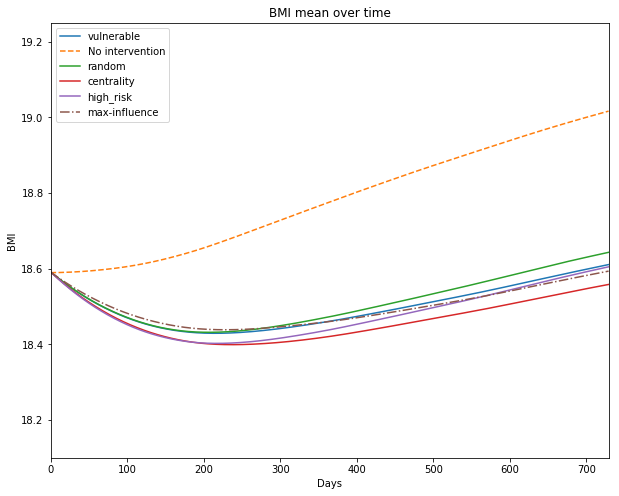

In [17]:
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
plt.ylim(18.1,19.25)
plt.xlim(0,729)

(0, 729)

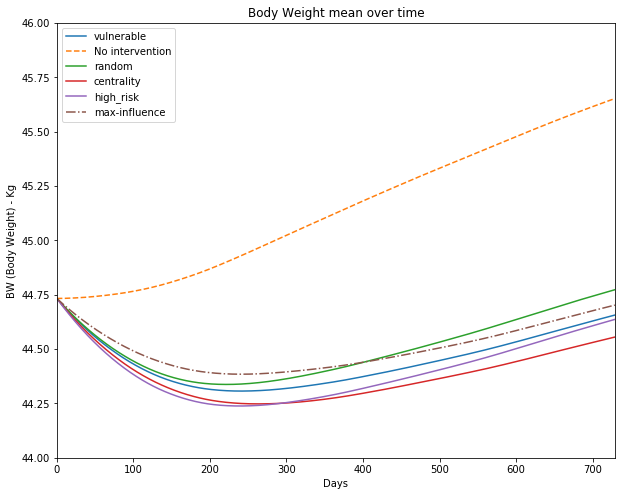

In [18]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
plt.ylim(44,46)
plt.xlim(0,729)

In [19]:
PA_dict = {}
EI_dict = {}
graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
for i in range(len(graphs)):
    diffuse_behavior(graph=graphs[i], intervention=None, years=2)
    results_dict = dict(graphs[i].nodes(data=True))
    for k, v in results_dict.items():
        PA_dict[k] = results_dict[k]['PA_hist']
    for k, v in results_dict.items():
        EI_dict[k] = results_dict[k]['EI_hist']

Simulation without interventions.
Cluster contains 28 nodes and 696 edges!
Simulation without interventions.
Cluster contains 25 nodes and 290 edges!
Simulation without interventions.
Cluster contains 21 nodes and 305 edges!
Simulation without interventions.
Cluster contains 20 nodes and 269 edges!
Simulation without interventions.
Cluster contains 20 nodes and 318 edges!
Simulation without interventions.
Cluster contains 19 nodes and 243 edges!
Simulation without interventions.
Cluster contains 19 nodes and 240 edges!
Simulation without interventions.
Cluster contains 19 nodes and 226 edges!
Simulation without interventions.
Cluster contains 18 nodes and 226 edges!
Simulation without interventions.
Cluster contains 18 nodes and 279 edges!
Simulation without interventions.
Cluster contains 17 nodes and 194 edges!
Simulation without interventions.
Cluster contains 17 nodes and 207 edges!
Simulation without interventions.
Cluster contains 17 nodes and 232 edges!
Simulation without interv

In [20]:
#pd.DataFrame(EI_dict).T.mean()

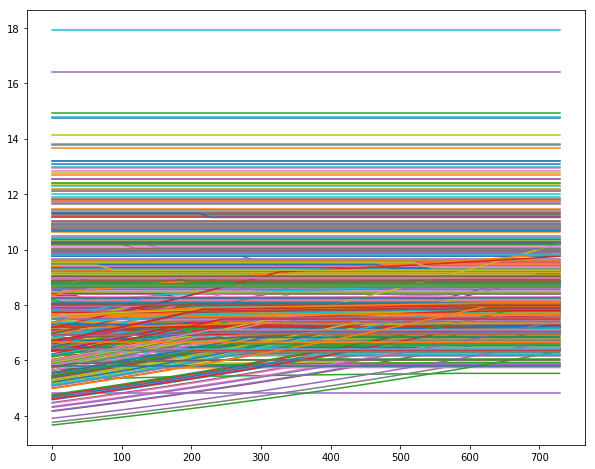

In [21]:
pd.DataFrame(EI_dict).plot(figsize=((10,8)))
plt.legend().set_visible(False)

In [22]:
error

NameError: name 'error' is not defined

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BMI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['EI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BW_hist'])

In [ ]:
age_mean = []
for node in GS.nodes():
    age_mean.append(GS.nodes()[node]['age'])

In [ ]:
np.mean(age_mean)